In [1]:
import h5py

from data_utils import get_dataset_path, get_brain_section, visualize_batch
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json

(1809, 1670, 3)


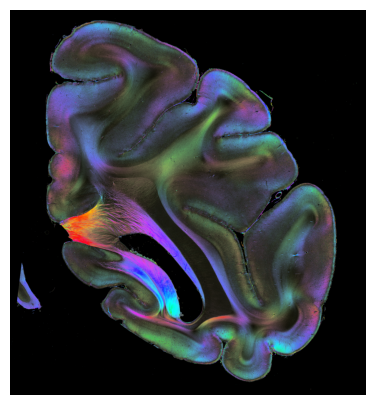

(1809, 1670)


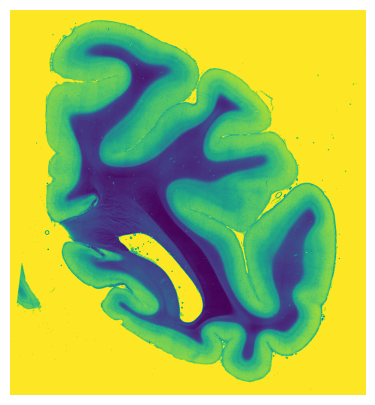

In [2]:
level = "04"
fom = get_brain_section(1818, 759, "left", "fom")
transmittance = get_brain_section(1818, 759, "left", "transmittance")
visualize_batch(fom['pyramid'][level],"fom", normalized=False)
visualize_batch(transmittance['pyramid'][level],"transmittance", normalized=False)


(4000, 5000, 3)


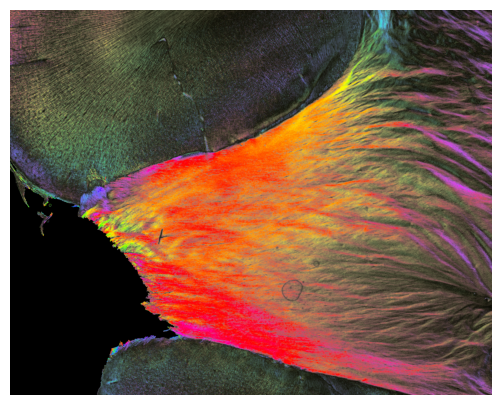

(4000, 5000)


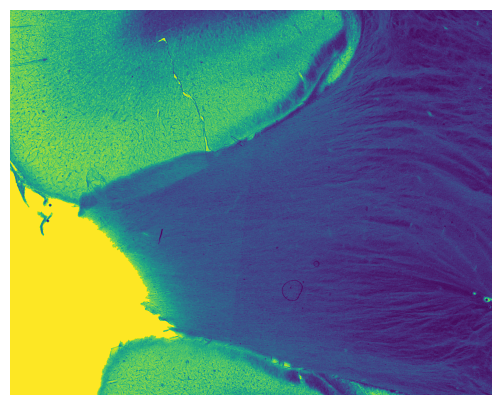

In [3]:
crop_fom = fom["Image"][14000:18000, 3000:8000, :]
crop_transmittance = transmittance["Image"][14000:18000, 3000:8000]
visualize_batch(crop_fom,"fom", normalized=False)
visualize_batch(crop_transmittance, "transmittance", normalized=False)


(8, 64, 64, 3)


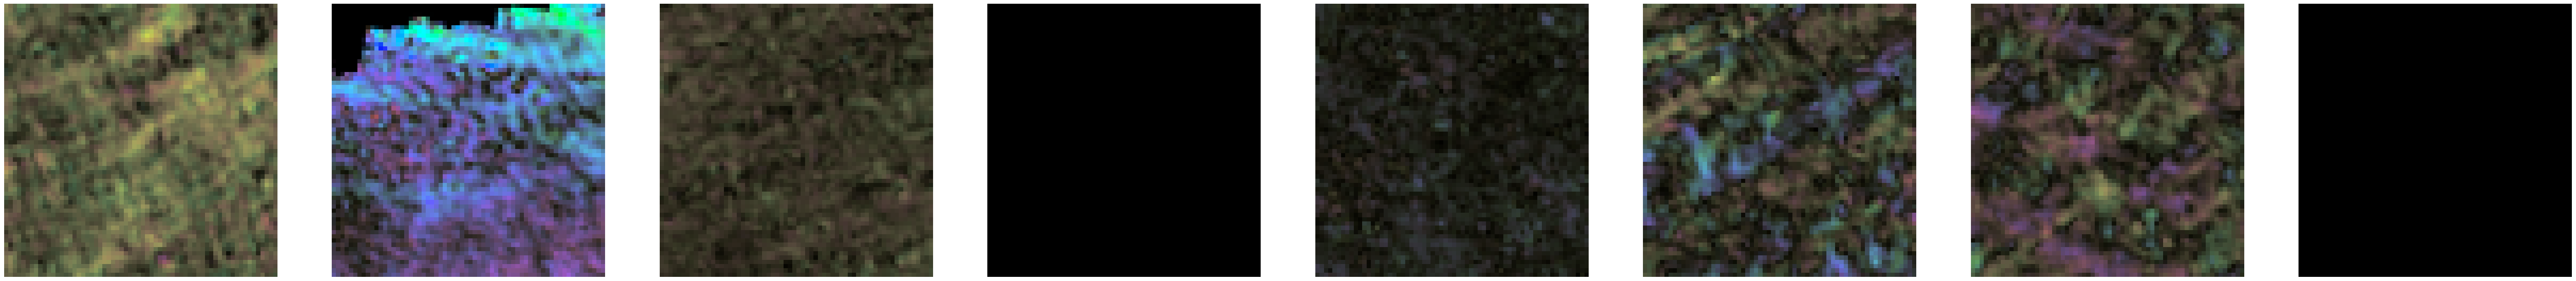

(8, 64, 64)


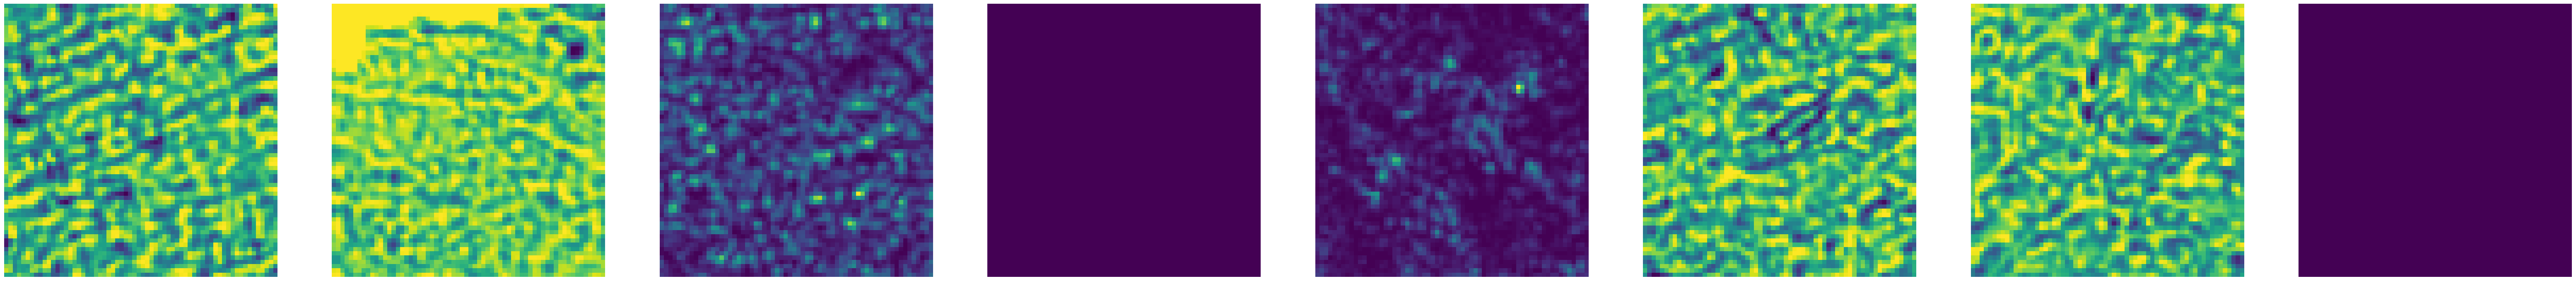

In [11]:
patch_size = 64
batch_fom = []
batch_transmittance = []
for i in range(8):
    row = np.random.randint(0, 18000)
    column = np.random.randint(0, 18000)
    batch_fom.append(fom["Image"][row:row + patch_size, column:column + patch_size, :])
    batch_transmittance.append(transmittance["Image"][row:row + patch_size, column:column + patch_size])
visualize_batch(np.array(batch_fom),"fom", normalized=False)
visualize_batch(np.array(batch_transmittance), "transmittance", normalized=False)


In [5]:
training_keys = {(1818, 759, "left"), (1818,820, "right"), (1818, 830, "right")}
map_type = "fom"
def to_list(x):
    return list(x) if isinstance(x, np.ndarray) else [float(x)]
def compute_stats(training_keys):
    max_val = float("-inf")
    min_val = float("inf")
    mean = 0
    std = 0
    pixel_count = 0
    # Compute max, min and mean
    for key in training_keys:
        f = get_brain_section(key[0], key[1], key[2], map_type)
        pixels = np.array(f["Image"])
        max_val = max(max_val, pixels.max()) if pixels.ndim == 2 else np.maximum(max_val, pixels.max(axis=(0,1)))
        min_val = min(max_val, pixels.min()) if pixels.ndim == 2 else np.minimum(max_val, pixels.min(axis=(0,1)))
        mean += pixels.sum() if pixels.ndim == 2 else pixels.sum(axis=(0,1))
        pixel_count += np.prod(pixels.shape) if pixels.ndim == 2 else np.prod(pixels.shape[0:2])
    mean = mean / pixel_count
    # Compute std 
    for key in training_keys:
        f = get_brain_section(key[0], key[1], key[2], map_type)
        pixels = np.array(f["Image"])
        std += np.sum((pixels - mean) ** 2) if pixels.ndim == 2 else np.sum((pixels - mean) ** 2, axis=(0,1))
    std = np.sqrt(std / pixel_count)
    return {"min": to_list(min_val), "max": to_list(max_val), "mean": to_list(mean), "std": to_list(std)}

stats = compute_stats(training_keys)
display(stats)
with open(os.path.join(get_dataset_path(),map_type, "stats.json"), "w") as outfile:
    json.dump(stats, outfile)

KeyboardInterrupt: 